In [21]:
# libraries - from Kaggle basics
import numpy as np
import pandas as pd
import matplotlib as plt
# import nltk as nltk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
#load data
train = pd.read_csv("/Users/ebrooks/Documents/thesis/project/py-wids/py-wids/data/train.csv")
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27674 entries, 0 to 27673
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             27674 non-null  int64  
 1   patient_race                           12522 non-null  object 
 2   payer_type                             24838 non-null  object 
 3   patient_state                          27595 non-null  object 
 4   patient_zip3                           27674 non-null  int64  
 5   patient_age                            27674 non-null  int64  
 6   patient_gender                         27674 non-null  object 
 7   bmi                                    8749 non-null   float64
 8   breast_cancer_diagnosis_code           27674 non-null  object 
 9   breast_cancer_diagnosis_desc           27674 non-null  object 
 10  breast_cancer_diagnosis_year           27674 non-null  int64  
 11  me

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.0,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,0.255319,2.234043,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,3.588679,7.915094,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.0,1749,"Malignant neoplasm of breast (female), unspeci...",...,9.184211,6.089474,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162


In [5]:
#split
Y = train["treatment_pd"] #label
X = train.drop(columns = "treatment_pd", axis = 1)
X_train, y_train, X_test, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 3911)

In [6]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19371 entries, 10689 to 6688
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             19371 non-null  int64  
 1   patient_race                           8754 non-null   object 
 2   payer_type                             17370 non-null  object 
 3   patient_state                          19310 non-null  object 
 4   patient_zip3                           19371 non-null  int64  
 5   patient_age                            19371 non-null  int64  
 6   patient_gender                         19371 non-null  object 
 7   bmi                                    6117 non-null   float64
 8   breast_cancer_diagnosis_code           19371 non-null  object 
 9   breast_cancer_diagnosis_desc           19371 non-null  object 
 10  breast_cancer_diagnosis_year           19371 non-null  int64  
 11  meta

In [7]:
# checking for missing values
missingValues = X_train.isnull().sum()
missingValues.sort_values(ascending=False)

metastatic_first_novel_treatment         19209
metastatic_first_novel_treatment_type    19209
bmi                                      13254
patient_race                             10617
metastatic_first_treatment_type           7727
                                         ...  
female                                       0
married                                      0
divorced                                     0
never_married                                0
veteran                                      0
Length: 82, dtype: int64

In [8]:
X_train.describe()

,patient_id,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
count,19371.000000,19371.000000,19371.000000,6117.000000,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000,...,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000,19370.000000,19370.000000,19371.000000,19371.000000,19371.000000
mean,550480.851531,523.341800,54.337257,29.265490,2016.487533,19862.880543,1637.842607,40.683651,11.114876,12.888442,...,0.121586,5.327062,6.457621,17.781716,13.464838,13.327296,4.563177,28.048504,8.563842,7.100337
std,261002.419819,292.454333,11.179356,5.623385,1.057015,13489.292065,3609.254939,4.019166,1.532318,1.867772,...,0.444809,5.943633,3.534419,17.472689,3.838588,5.706208,6.492206,4.884676,4.314038,3.102718
min,100051.000000,6.000000,19.000000,14.000000,2015.000000,636.000000,0.821739,20.600000,0.000000,6.314286,...,0.000000,0.002564,0.433333,0.060714,4.600000,3.433333,0.000000,12.460784,1.165385,1.200000
25%,325434.000000,295.000000,47.000000,25.000000,2016.000000,8893.000000,168.920833,37.734426,10.149254,11.794915,...,0.021622,1.303448,3.892593,4.608824,10.270492,9.341176,0.969355,24.968182,5.492727,4.972222
50%,548243.000000,490.000000,55.000000,28.740000,2016.000000,18259.000000,627.904167,40.761765,11.030233,12.923944,...,0.045588,3.350000,5.578689,11.454286,13.093333,12.122857,2.602128,27.793548,7.382500,6.919298
75%,778083.500000,785.000000,62.000000,33.000000,2017.000000,27537.000000,1530.765000,43.205630,12.177193,13.930435,...,0.129630,7.630000,8.663889,24.485185,15.671698,16.433333,5.958333,30.918519,10.685417,8.747887
max,999996.000000,999.000000,91.000000,97.000000,2018.000000,71374.000000,29851.685710,57.417647,17.675000,35.300000,...,14.758442,33.188889,26.429870,99.104348,35.155556,48.931818,74.067391,48.020000,29.565000,21.426667


In [9]:
X_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_5

In [ ]:
# counts of payer types
df = X_train['payer_type']
df.value_counts()

In [37]:
# counts of breast cancer diagnosis desc
df = X_train['breast_cancer_diagnosis_desc']
df.value_counts()

breast_cancer_diagnosis_desc
Malignant neoplasm of unspecified site of left female breast        2793
Malignant neoplasm of unsp site of right female breast              2775
Malignant neoplasm of breast (female), unspecified                  1966
Malig neoplasm of upper-outer quadrant of left female breast        1845
Malig neoplm of upper-outer quadrant of right female breast         1830
Malignant neoplasm of unsp site of unspecified female breast        1388
Malignant neoplasm of ovrlp sites of right female breast             908
Malignant neoplasm of ovrlp sites of left female breast              875
Malig neoplasm of upper-inner quadrant of left female breast         570
Malig neoplm of upper-inner quadrant of right female breast          546
Malignant neoplasm of upper-outer quadrant of female breast          400
Malig neoplasm of lower-outer quadrant of left female breast         371
Malignant neoplasm of central portion of right female breast         368
Malignant neoplasm of 

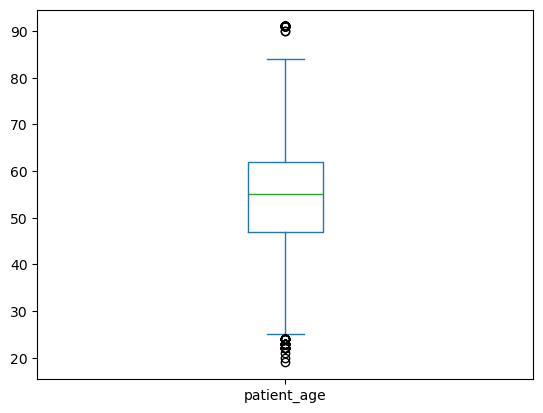

In [28]:
# patient age boxplot
df = X_train[['patient_age']]
boxplot_1 = df.plot.box(column = 'patient_age')